In [2]:
import xarray as xr
import pandas as pd
import os
import geopandas as gpd
from shapely.geometry import mapping
import numpy as np

In [46]:
!pip install rioxarray

You should consider upgrading via the 'C:\Users\dboateng\Anaconda3\envs\regionmask_env\python.exe -m pip install --upgrade pip' command.


In [51]:
# set paths
import regionmask
era_data_path="C:/Users/dboateng/Desktop/Datasets/ERA5/monthly_1950_2021/"
path_shapefile="C:/Users/dboateng/Desktop/Datasets/Station/Ghana/Ghana_ShapeFile/gh_wgs16dregions.shp"
afr_shape = "C:/Users/dboateng/Desktop/Datasets/Station/Ghana/Africa_shapefile/afr_g2014_2013_0.shp"

from1979to2012 = pd.date_range(start="1979-01-01", end="2012-12-31", freq="MS")
# read data

ghana_shape = gpd.read_file(path_shapefile)

In [56]:
tp_monthly= xr.open_dataset(os.path.join(era_data_path, "tp_monthly.nc"))
tp_monthly = tp_monthly["tp"].sel(time=from1979to2012).mean(dim="time")
tp_monthly = tp_monthly.assign_coords({"longitude": (((tp_monthly.longitude + 180) % 360) - 180)})

In [57]:
import rioxarray
tp_monthly.rio.set_spatial_dims(x_dim="longitude", y_dim="latitude", inplace=True)
tp_monthly.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)>
array([[0.00069632, 0.00069632, 0.00069632, ..., 0.00069632, 0.00069632,
        0.00069632],
       [0.00070333, 0.00070337, 0.00070338, ..., 0.00070332, 0.00070333,
        0.00070335],
       [0.0006945 , 0.00069459, 0.00069464, ..., 0.00069443, 0.00069443,
        0.00069447],
       ...,
       [0.00017392, 0.0001739 , 0.00017387, ..., 0.00017391, 0.00017391,
        0.00017392],
       [0.00017434, 0.00017429, 0.00017429, ..., 0.00017439, 0.00017439,
        0.0001744 ],
       [0.00018674, 0.00018674, 0.00018674, ..., 0.00018674, 0.00018674,
        0.00018674]], dtype=float32)
Coordinates:
    expver       float64 ...
  * longitude    (longitude) float32 0.0 0.25 0.5 0.75 ... -1.0 -0.75 -0.5 -0.25
  * latitude     (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
    spatial_ref  int32 0

In [58]:
clipped = tp_monthly.rio.clip(ghana_shape.geometry.apply(mapping), ghana_shape.crs, drop=True)

In [60]:
clipped

<xarray.DataArray 'tp' (latitude: 22, longitude: 1440)>
array([[0.00216022, 0.00199021, 0.00189564, ..., 0.00212618, 0.001947  ,
        0.00184436],
       [       nan,        nan,        nan, ..., 0.00205568, 0.00212555,
        0.00212988],
       [0.00244041, 0.00207277, 0.00209045, ..., 0.00240557, 0.00269521,
        0.00254029],
       ...,
       [0.0036659 , 0.00372819, 0.00330154, ..., 0.00386723, 0.00438464,
        0.00364647],
       [0.00347596, 0.00212743, 0.00262582, ..., 0.0040779 , 0.00491352,
        0.00403812],
       [0.00188213, 0.00165231, 0.00205362, ..., 0.00494683, 0.00430314,
        0.0027265 ]], dtype=float32)
Coordinates:
  * latitude     (latitude) float64 11.0 10.75 10.5 10.25 ... 6.5 6.25 6.0 5.75
  * longitude    (longitude) float64 0.0 0.25 0.5 0.75 ... -1.0 -0.75 -0.5 -0.25
    expver       float64 1.0
    spatial_ref  int32 0

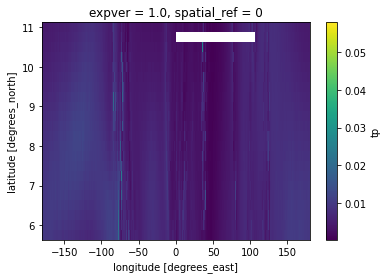

In [62]:
clipped.sortby("longitude").plot()

In [5]:
africa_shape = gpd.read_file(afr_shape)

In [6]:
africa_shape

,ADM0_CODE,ADM0_NAME,CONTINENT,ISO3,ISO2,UNI,UNDP,FAOSTAT,GAUL,RIC_ISO3,...,CRA,ECOWAS,IGAD,IOC,SADC,CICOS,ICPAC,BDMS,MOI,geometry
0,6,Sudan,Africa,SDN,SD,729.0,SUD,276.0,6.0,ICPAC-SDN,...,0,0,4,0,0,0.0,14.0,0.0,NaN,"MULTIPOLYGON (((38.58148 18.02542, 38.58203 18..."
1,8,Angola,Africa,AGO,AO,24.0,ANG,7.0,8.0,BDMS-AGO,...,0,0,0,0,6,0.0,0.0,16.0,NaN,"MULTIPOLYGON (((11.79481 -16.81925, 11.79375 -..."
2,29,Benin,Africa,BEN,BJ,204.0,BEN,53.0,29.0,CRA-BEN,...,13,3,0,0,0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((1.86343 6.28872, 1.86292 6.288..."
3,35,Botswana,Africa,BWA,BW,72.0,BOT,20.0,35.0,BDMS-BWA,...,0,0,0,0,6,0.0,0.0,16.0,NaN,"POLYGON ((25.17447 -17.77881, 25.18476 -17.783..."
4,42,Burkina Faso,Africa,BFA,BF,854.0,BKF,233.0,42.0,CRA-BFA,...,13,3,0,0,0,0.0,0.0,0.0,NaN,"POLYGON ((-0.45567 15.08082, -0.45411 15.07937..."
5,45,Cameroon,Africa,CMR,CM,120.0,CMR,32.0,45.0,CICOS-CMR,...,0,0,0,0,0,11.0,0.0,0.0,NaN,"MULTIPOLYGON (((9.26462 3.94935, 9.26302 3.948..."
6,47,Cape Verde,Africa,CPV,CV,132.0,CVI,35.0,47.0,CRA-CPV,...,13,3,0,0,0,0.0,0.0,0.0,NaN,"MULTIPOLYGON (((-24.69949 14.89513, -24.69853 ..."
7,49,Central African Republic,Africa,CAF,CF,140.0,CAF,37.0,49.0,CICOS-CAF,...,0,0,0,0,0,11.0,0.0,0.0,NaN,"POLYGON ((22.52068 11.00757, 22.55266 10.99373..."
8,50,Chad,Africa,TCD,TD,148.0,CHD,39.0,50.0,CRA_CICOS-TCD,...,13,0,0,0,0,11.0,0.0,0.0,0.0,"POLYGON ((24.00000 16.00000, 24.00000 15.71112..."
9,58,Comoros,Africa,COM,KM,174.0,COI,45.0,58.0,MOI-COM,...,0,0,0,5,0,NaN,NaN,NaN,15.0,"MULTIPOLYGON (((43.71993 -12.40682, 43.72064 -..."


In [22]:
regions =ghana_shape["REGION"]
regions

0     WESTERN NORTH
1           WESTERN
2             VOLTA
3        UPPER WEST
4        UPPER EAST
5          SAVANNAH
6               OTI
7          NORTHERN
8        NORTH EAST
9     GREATER ACCRA
10          EASTERN
11          CENTRAL
12        BONO EAST
13             BONO
14          ASHANTI
15            AHAFO
Name: REGION, dtype: object

In [15]:
my_list

{'AHAFO',
 'ASHANTI',
 'BONO',
 'BONO EAST',
 'CENTRAL',
 'EASTERN',
 'GREATER ACCRA',
 'NORTH EAST',
 'NORTHERN',
 'OTI',
 'SAVANNAH',
 'UPPER EAST',
 'UPPER WEST',
 'VOLTA',
 'WESTERN',
 'WESTERN NORTH'}

In [23]:
countries_mask_poly = regionmask.Regions(outlines=ghana_shape.geometry)

In [24]:
countries_mask_poly

<regionmask.Regions>
Name:     unnamed
overlap:  False

Regions:
 0  r0  Region0
 1  r1  Region1
 2  r2  Region2
 3  r3  Region3
 4  r4  Region4
..  ..      ...
11 r11 Region11
12 r12 Region12
13 r13 Region13
14 r14 Region14
15 r15 Region15

[16 regions]

In [66]:
tp_monthly= xr.open_dataset(os.path.join(era_data_path, "tp_monthly.nc"))
tp_monthly = tp_monthly["tp"].sel(time=from1979to2012).mean(dim="time")

In [67]:
mask = countries_mask_poly.mask(tp_monthly, lat_name="latitude", lon_name="longitude", wrap_lon=True)

In [68]:
mask

<xarray.DataArray 'mask' (latitude: 721, longitude: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    expver     float64 1.0
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

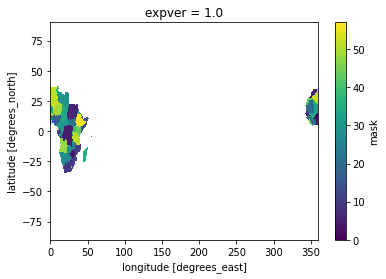

In [69]:
mask.plot()

In [76]:
droped = mask.dropna(dim=("latitude"), how="any")

In [77]:
droped

<xarray.DataArray 'mask' (latitude: 0, longitude: 1440)>
array([], shape=(0, 1440), dtype=float64)
Coordinates:
    expver     float64 1.0
  * latitude   (latitude) float32 
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

In [41]:
countries = list(africa_shape["ISO3"])
my_list = set(list(countries))
indexes = [countries.index(x) for x in my_list]

countries_mask_poly = regionmask.Regions(name="ADM0_NAME", numbers=indexes, 
                                           names=africa_shape.ADM0_NAME[indexes],
                                           outlines=list(africa_shape.geometry.values[i] for i in range(0, africa_shape.shape[0])),
                                          abbrevs=africa_shape["ADM0_CODE"][indexes])

In [42]:
countries_mask_poly

<regionmask.Regions>
Name:     ADM0_NAME
overlap:  False

Regions:
 0     6                 Sudan
 1     8                Angola
 2    29                 Benin
 3    35              Botswana
 4    42          Burkina Faso
..   ...                   ...
50   169               Morocco
51   205                Rwanda
52   214 Sao Tome and Principe
53   248               Tunisia
57 40765                 Egypt

[55 regions]

In [45]:
countries_mask_poly[20]

<regionmask._OneRegion: Ghana (94 / 20)>